# Project: Wrangle And Analyze Data

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Storing Data](#storing)
- [Insights](#insights)



<a id='intro'></a>
## Introduction: 
This project focuses on the steps and procedures of data wrangling, the datasets that I will be wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

### Data Wrangling Process:
1- Gathering Data

2- Assessing Data

3- Cleaning Data


<a id='gathering'></a>
## 1. Gathering data

This is the first step of the wrangling process, I chose to gather my data by reading it from various files which are as follows:

twitter-archive-enhanced.csv

image-predictions.tsv

tweet-json.txt

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import requests
import os
%matplotlib inline

In [2]:
#loading data from saved file
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
#loading data from link
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open(os.path.join('image-predictions.tsv'), mode ="wb") as file:
        file.write(response.content)
#loading data from saved file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
#loading data from saved file
tweets_json = pd.read_json('tweet-json.txt', lines=True)

In [ ]:
#!!!!DO NOT RUN
#code as provided in the project space in udacity's classroom twitter-api.py file 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

<a id='assessing'></a>
## 2. Assessing data
This is the second step of the wrangling process, which includes viewing the data to assess the issues it might contain such as missing data, quality and tidiness issues.

### Viewing Data

In [3]:
#viewing twitter-archive-enhanced.csv data to see what it looks like
tweets_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
tweets_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [5]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
tweets_archive.duplicated().sum()

0

In [7]:
tweets_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
tweets_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
270   841314665196081154                    NaN                  NaN   
1125  730196704625098752                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
700   786233965241827333                    NaN                  NaN   
1292  708109389455101952                    NaN                  NaN   

                      timestamp  \
270   2017-03-13 15:47:01 +0000   
1125  2016-05-11 00:43:55 +0000   
68    2017-06-26 00:13:58 +0000   
700   2016-10-12 15:55:59 +0000   
1292  2016-03-11 01:56:49 +0000   

                                                 source  \
270   <a href="http://twitter.com" rel="nofollow">Tw...   
1125  <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
700   <a href="http://twitter.com/download/iphone" r...   
1292  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
270   This is Max. There's no way in h*ck you're tak...                  NaN   
1125  This is Charles. He's camera shy. Tail longer ...                  NaN   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
700   This is Mattie. She's extremely dangerous. Wil...                  NaN   
1292  This is Remington. He was caught off guard by ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
270                        NaN                        NaN   
1125                       NaN                        NaN   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
700                        NaN                        NaN   
1292                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
270   https://twitter.com/dog_rates/status/841314665...                13   
1125  https://twitter.com/dog_rates/status/730196704...                 6   
68    https://twitter.com/dog_rates/status/878057613...                14   
700   https://twitter.com/dog_rates/status/786233965...                11   
1292  https://twitter.com/dog_rates/status/708109389...                10   

      rating_denominator       name doggo floofer pupper puppo  
270                   10        Max  None    None   None  None  
1125                  10    Charles  None    None   None  None  
68                    10       Emmy  None    None   None  None  
700                   10     Mattie  None    None   None  None  
1292                  10  Remington  None    None   None  None

In [9]:
#checking the names values in twitter_archive 
tweets_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Gustav       1
Cedrick      1
Maisey       1
Rorie        1
Kaiya        1
Name: name, Length: 957, dtype: int64

In [10]:
#checking the rating_numerator values in twitter_archive
tweets_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
#checking if the rating_denominator column has only the expected value of '10'
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# Viewing the image_predictions.tsv data
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [13]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.duplicated().sum()

0

In [16]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1450  776218204058357768  https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg   
227   670374371102445568  https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg   
1368  761750502866649088  https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
160   668902994700836864  https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg   
206   669926384437997569  https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1450        1           Samoyed  0.940326    True          Pomeranian   
227         1  English_springer  0.974936    True      English_setter   
1368        1  golden_retriever  0.586937    True  Labrador_retriever   
160         1  Brittany_spaniel  0.828425    True        Ibizan_hound   
206         1        Pomeranian  0.984231    True            keeshond   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1450  0.055527    True          keeshond  0.002226    True  
227   0.011661    True    cocker_spaniel  0.002689    True  
1368  0.398260    True            kuvasz  0.005410    True  
160   0.043082    True  Blenheim_spaniel  0.028004    True  
206   0.010231    True          papillon  0.002219    True

In [18]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
#viewing the tweets_json.txt data
tweets_json.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

In [20]:
tweets_json.describe()

id        id_str  in_reply_to_status_id  \
count  2.354000e+03  2.354000e+03           7.800000e+01   
mean   7.426978e+17  7.426978e+17           7.455079e+17   
std    6.852812e+16  6.852812e+16           7.582492e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.783975e+17  6.783975e+17           6.757419e+17   
50%    7.194596e+17  7.194596e+17           7.038708e+17   
75%    7.993058e+17  7.993058e+17           8.257804e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.800000e+01         7.800000e+01   
mean                7.455079e+17         2.014171e+16   
std                 7.582492e+16         1.252797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757419e+17         3.086374e+08   
50%                 7.038708e+17         4.196984e+09   
75%                 8.257804e+17         4.196984e+09   
max                 8.862664e+17         8.405479e+17   

       in_reply_to_user_id_str  geo  coordinates  contributors  retweet_count  \
count             7.800000e+01  0.0          0.0           0.0    2354.000000   
mean              2.014171e+16  NaN          NaN           NaN    3164.797366   
std               1.252797e+17  NaN          NaN           NaN    5284.770364   
min               1.185634e+07  NaN          NaN           NaN       0.000000   
25%               3.086374e+08  NaN          NaN           NaN     624.500000   
50%               4.196984e+09  NaN          NaN           NaN    1473.500000   
75%               4.196984e+09  NaN          NaN           NaN    3652.000000   
max               8.405479e+17  NaN          NaN           NaN   79515.000000   

       favorite_count  possibly_sensitive  possibly_sensitive_appealable  \
count     2354.000000              2211.0                         2211.0   
mean      8080.968564                 0.0                            0.0   
std      11814.771334                 0.0                            0.0   
min          0.000000                 0.0                            0.0   
25%       1415.000000                 0.0                            0.0   
50%       3603.500000                 0.0                            0.0   
75%      10122.250000                 0.0                            0.0   
max     132810.000000                 0.0                            0.0   

       quoted_status_id  quoted_status_id_str  
count      2.900000e+01          2.900000e+01  
mean       8.162686e+17          8.162686e+17  
std        6.164161e+16          6.164161e+16  
min        6.721083e+17          6.721083e+17  
25%        7.888183e+17          7.888183e+17  
50%        8.340867e+17          8.340867e+17  
75%        8.664587e+17          8.664587e+17  
max        8.860534e+17          8.860534e+17

In [21]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
tweets_json.id.duplicated().sum()

0

In [23]:
tweets_json.sample(5)

created_at                  id              id_str  \
1250 2016-03-18 15:05:29+00:00  710844581445812225  710844581445812224   
1907 2015-12-09 02:56:22+00:00  674422304705744896  674422304705744896   
2292 2015-11-19 00:32:12+00:00  667138269671505920  667138269671505920   
2223 2015-11-22 04:33:59+00:00  668286279830867968  668286279830867968   
333  2017-02-17 20:05:43+00:00  832682457690300417  832682457690300416   

                                              full_text  truncated  \
1250  This is Staniel. His selfie game is strong af....      False   
1907  This is Ava. She doesn't understand flowers. 1...      False   
2292  Extremely intelligent dog here. Has learned to...      False   
2223  Meet Rusty. Rusty's dreaming of a world where ...      False   
333   Prosperous good boy 13/10 socioeconomic af htt...      False   

     display_text_range                                           entities  \
1250           [0, 102]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1907            [0, 94]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2292           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2223           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
333             [0, 42]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
1250  {'media': [{'id': 710844577050206208, 'id_str'...   
1907  {'media': [{'id': 674422297940357120, 'id_str'...   
2292  {'media': [{'id': 667138263048585216, 'id_str'...   
2223  {'media': [{'id': 668286272272769024, 'id_str'...   
333                                                 NaN   

                                                 source  \
1250  <a href="http://twitter.com/download/iphone" r...   
1907  <a href="http://twitter.com/download/iphone" r...   
2292  <a href="http://twitter.com/download/iphone" r...   
2223  <a href="http://twitter.com/download/iphone" r...   
333   <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
1250                    NaN  ...            2775      False      False   
1907                    NaN  ...            1536      False      False   
2292                    NaN  ...            4851      False      False   
2223                    NaN  ...             535      False      False   
333                     NaN  ...           13017      False      False   

     possibly_sensitive possibly_sensitive_appealable  lang  retweeted_status  \
1250                0.0                           0.0    en               NaN   
1907                0.0                           0.0    en               NaN   
2292                0.0                           0.0    en               NaN   
2223                0.0                           0.0    en               NaN   
333                 0.0                           0.0    en               NaN   

     quoted_status_id  quoted_status_id_str  \
1250              NaN                   NaN   
1907              NaN                   NaN   
2292              NaN                   NaN   
2223              NaN                   NaN   
333      8.322683e+17          8.322683e+17   

                                          quoted_status  
1250                                                NaN  
1907                                                NaN  
2292                                                NaN  
2223                                                NaN  
333   {'created_at': 'Thu Feb 16 16:40:00 +0000 2017...  

[5 rows x 31 columns]

### Quality Issues
Quality issues include issues in the raw dataset such as missing, duplicate and incorrect data values. quality issues in the data sets include: 

1. timestamp column type in tweets_archive should be datetime type and not object

2. missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls  from tweets_archive. 

3. The headers p1, p1_conf, p1_dog, p2, p2_dog, p2_conf, p3, p3_dog and p3_conf of Image_predictions should be changed to be more descriptive and clear
 
4. There are empty columns: geo, coordinates, place  (has only 1 value) and contributors from tweets_json

5. rating_numerator column has incorrect values and all rows with incorrect values should be dropped from tweets_archive

6. rating_denominator column from tweets_archive also has incorrect values and all values should be 10

7. tweets_archive's name column is not descriptive enough, should be changed to dog_name

8. From the tweets_json table the id and id_str are both int types and they should be strings since no mathematicals operations should be done on them, same goes for tweet_id from the tweets_archive and image_predictions tables.

9. there are incorrect values ('a','None') for the name attribute in the tweets_archive table


### Tidiness Issues
Tidiness issues are structural issues that exist in the raw/unrefined dataset, they should be addressed and fixed, some of the tidiness issues that exist in the data are as follows:

1. There are too many columns in the tweets_json table that are very specific and might not be needed for most. I will keep the most generic/useful columns in most cases which are as follows: id (which I will change to tweet_id to match the other tables), favorite_count and retweet_count. These columns will be combined with the archive table, since both tables are different representations of the same data, there are only two records that are missing from the tweets_json table which exists in the archive table so I will drop them from the archive table.


2. From the tweets_archive table columns: doggo, floofer, pupper, and puppo are type values so they shouldn't be column heads, should have a column named stage to define these values


<a id="cleaning"></a>
## Cleaning Data

This is the last step of the data wrangling process, this process has 3 steps per issue: 

1. Define
2. Code
3. Test 

I will start by fixing the quality issues then I will do the tidiness issues all of which were defined in the previous section.

First I will create new duplicate tables of the 3 data tables to perform my cleaning on them so the original data files stay in their original form: 

In [24]:
#creating duplicates of the data tables
new_twt_archive = tweets_archive.copy()
new_img_prediction = image_predictions.copy()
new_twt_json = tweets_json.copy()

### Cleaning Quality Issues

**Define:**
1. timestamp column type in tweets_archive should be datetime type and not object
 
**Code:**

In [25]:
#convert timestamp into string 
new_twt_archive['timestamp'] = pd.to_datetime(new_twt_archive['timestamp'])

**Test:** 

In [26]:
#test the code:
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Define:**

2. missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls  from tweets_archive. 

To fix this I will do the following:

- remove replies and retweets since they're not needed
- drop the columns related to replies and retweets since they contain too many null values

**Code:**

In [27]:
#removing replies and retweets from twitter_archive
replies = new_twt_archive['in_reply_to_status_id'].isnull()
retweets = new_twt_archive['retweeted_status_id'].isnull()
new_twt_archive = new_twt_archive[replies&retweets]

In [28]:
#deleting unnecessary columns
new_twt_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp',], axis=1, inplace=True)

**Test**:

In [29]:
#confirming columns removal and rows deduction
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define:**

The headers p1, p1_conf, p1_dog, p2, p2_dog, p2_conf, p3, p3_dog and p3_conf of Image_predictions should be changed to be more descriptive and clear as it was described in the project details:

p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever

p1_conf is how confident the algorithm is in its #1 prediction → 95%

p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

p2 is the algorithm's second most likely prediction → Labrador retriever

p2_conf is how confident the algorithm is in its #2 prediction → 1%

p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.


**Code:**

In [30]:
#changing column names
new_img_prediction.rename(columns={'p1':'1st_prediction', 'p1_conf':'1st_confidence', 'p1_dog':'1st_accuracy', 
                                   'p2':'2nd_prediction', 'p2_conf':'2nd_confidence', 'p2_dog':'2nd_accuracy',
                                   'p3':'3rd_prediction', 'p3_conf':'3rd_confidence', 'p3_dog':'3rd_accuracy'},
                          inplace=True)

**Test:**

In [31]:
new_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   1st_prediction  2075 non-null   object 
 4   1st_confidence  2075 non-null   float64
 5   1st_accuracy    2075 non-null   bool   
 6   2nd_prediction  2075 non-null   object 
 7   2nd_confidence  2075 non-null   float64
 8   2nd_accuracy    2075 non-null   bool   
 9   3rd_prediction  2075 non-null   object 
 10  3rd_confidence  2075 non-null   float64
 11  3rd_accuracy    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Define:**

There are empty columns: geo, coordinates, place (has only 1 value) and contributors from tweets_json

To solve this I will simply drop the columns since no one really needs empty columns

**Code:**

In [32]:
new_twt_json.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1, inplace=True)

**Test:**

In [33]:
new_twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**Define:**

rating_numerator column has incorrect values and all rows with incorrect values should be dropped from tweets_archive.

the correct values range is: 10<value<15

**Code:**

In [34]:
#query so only the correct values remain in new_twt_archive
new_twt_archive = new_twt_archive.query('rating_numerator > 10 and rating_numerator < 15')

**Test:**

In [35]:
#check if the only remaining values are in range of 10<value<15
new_twt_archive.rating_numerator.value_counts()

12    486
11    413
13    287
14     38
Name: rating_numerator, dtype: int64

**Define:**

rating_denominator column from tweets_archive also has incorrect values and all values should be 10

**Code:**

In [36]:
#set all rating_denominator values to 10
new_twt_archive.rating_denominator = 10

**Test:**

In [37]:
#check if the only remaining values are 10s
new_twt_archive.rating_denominator.value_counts()

10    1224
Name: rating_denominator, dtype: int64

**Define:**

tweets_archive's name column is not descriptive enough, should be changed to dog_name

**Code:**

In [38]:
#change column name to dog_name
new_twt_archive.rename(columns={'name':'dog_name'},inplace=True)

**Test:**

In [56]:
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1224 non-null   int64              
 1   timestamp           1224 non-null   datetime64[ns, UTC]
 2   source              1224 non-null   object             
 3   text                1224 non-null   object             
 4   expanded_urls       1223 non-null   object             
 5   rating_numerator    1224 non-null   int64              
 6   rating_denominator  1224 non-null   int64              
 7   dog_name            1224 non-null   object             
 8   doggo               1224 non-null   object             
 9   floofer             1224 non-null   object             
 10  pupper              1224 non-null   object             
 11  puppo               1224 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define:**

From the tweets_json table the id and id_str are both int types and they should be strings since no mathematicals operations should be done on them, same goes for tweet_id from the tweets_archive and image_predictions tables.

**Code:**

In [57]:
#changing incorrect data types
new_twt_archive['tweet_id'] = new_twt_archive['tweet_id'].astype(str)
new_img_prediction['tweet_id'] = new_img_prediction['tweet_id'].astype(str)
new_twt_json['id'] = new_twt_json['id'].astype(str)

**Test:**

In [58]:
#print out data types of each column
print("new_twt_archive : " + str(new_twt_archive.tweet_id.dtype))
print("new_img_prediction : " + str(new_img_prediction.tweet_id.dtype))
print("new_twt_json : " + str(new_twt_json.id.dtype))

new_twt_archive : object
new_img_prediction : object
new_twt_json : object


**Define:**

there are incorrect values ('a','None') for the name attribute in the tweets_archive table and they should be replaced with null values so they don't count as entries

**Code:**

In [62]:
#replacing filler names with NaN values
name_filler = np.array(['a','None'])
new_twt_archive.dog_name.replace(name_filler, np.NaN, inplace = True)

**Test:**

In [63]:
#checking if 'a' and 'None' values remain
new_twt_archive.dog_name.value_counts()

Charlie    9
Cooper     8
Tucker     8
Oliver     8
Lucy       7
          ..
Beya       1
Lili       1
Snoopy     1
Davey      1
Hunter     1
Name: dog_name, Length: 635, dtype: int64

In [65]:
#check if Nan values exists now in dog_name column
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1224 non-null   object             
 1   timestamp           1224 non-null   datetime64[ns, UTC]
 2   source              1224 non-null   object             
 3   text                1224 non-null   object             
 4   expanded_urls       1223 non-null   object             
 5   rating_numerator    1224 non-null   int64              
 6   rating_denominator  1224 non-null   int64              
 7   dog_name            879 non-null    object             
 8   doggo               1224 non-null   object             
 9   floofer             1224 non-null   object             
 10  pupper              1224 non-null   object             
 11  puppo               1224 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Cleaning Tidiness Issues

**Define:**

There are too many columns in the tweets_json table that are very specific and might not be needed for most. I will keep the most generic/useful columns in most cases which are as follows: id (which I will change to tweet_id to match the other tables), favorite_count and retweet_count. All tables will be combined with the archive table,  there are only two records that are missing from the tweets_json table which exists in the archive table so I will drop them from the archive table as for the image_predictions table there are too many missing data so I will merge it as it is.

**Code:**

In [39]:
#change column name from id to tweet_id
new_twt_json.rename(columns={'id':'tweet_id'},inplace=True)

In [40]:
#dropping the unneeded columns
new_twt_json.drop(['id_str', 'full_text', 'truncated',
                 'display_text_range', 'entities', 'extended_entities','source', 
                 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang',
                 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
                 'quoted_status_id', 'quoted_status_id_str', 'favorited','retweeted','retweeted_status',
                 'source', 'truncated', 'user'], axis=1, inplace=True) 

In [42]:
#merging the two tables 
new_twt_archive = pd.merge(new_twt_archive, new_twt_json, on='tweet_id', how='left')
new_twt_archive = pd.merge(new_twt_archive, new_img_prediction, on='tweet_id', how='left')

**Test:**

In [43]:
new_twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   tweet_id        2354 non-null   int64              
 2   retweet_count   2354 non-null   int64              
 3   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


In [44]:
#testing the merge
list(new_twt_archive.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'created_at',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 '1st_prediction',
 '1st_confidence',
 '1st_accuracy',
 '2nd_prediction',
 '2nd_confidence',
 '2nd_accuracy',
 '3rd_prediction',
 '3rd_confidence',
 '3rd_accuracy']

**Define:**

From the tweets_archive table columns: doggo, floofer, pupper, and puppo are type values so they shouldn't be column heads, should have a column named stage to define these values

**Code:**

In [45]:
#replacing None values with null
new_twt_archive.doggo.replace('None', '', inplace=True)
new_twt_archive.floofer.replace('None', '', inplace=True)
new_twt_archive.pupper.replace('None', '', inplace=True)
new_twt_archive.puppo.replace('None', '', inplace=True)

In [46]:
#creating stage and concatenating all four columns in it
new_twt_archive['stage'] = new_twt_archive.doggo + new_twt_archive.floofer + new_twt_archive.pupper + new_twt_archive.puppo

#replacing all empty values with numpy's NaN
new_twt_archive.stage.replace('', np.nan, inplace=True)

In [47]:
#dropping the unneeded columns
new_twt_archive.drop(['doggo', 'floofer' ,'pupper', 'puppo'], axis = 1, inplace=True)

In [48]:
#seperating values
new_twt_archive.stage.replace('doggopupper', 'doggo-pupper', inplace=True)
new_twt_archive.stage.replace('doggofloofer', "doggo-floofer", inplace=True)
new_twt_archive.stage.replace('doggopuppo', 'doggo-puppo', inplace=True)

**Test:**

In [49]:
#Testing if the concatenation is successful 
list(new_twt_archive.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'created_at',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 '1st_prediction',
 '1st_confidence',
 '1st_accuracy',
 '2nd_prediction',
 '2nd_confidence',
 '2nd_accuracy',
 '3rd_prediction',
 '3rd_confidence',
 '3rd_accuracy',
 'stage']

In [50]:
#testing to see if the stage column has the proper values
new_twt_archive.stage.value_counts()

pupper           130
doggo             61
puppo             19
floofer            8
doggo-pupper       7
doggo-puppo        1
doggo-floofer      1
Name: stage, dtype: int64

<a id='storing'></a>
## Storing Data

In this section I will store the cleaned data into a csv file using the following code:

In [51]:
#saving data into csv files
new_twt_archive.to_csv('twitter_archive_master.csv', index=False)

<a id='insights'></a>
## Insights

Finally, I will end this project with some insights and observations that I've found from the cleaned datasets.


The following line plot will demonstrate my first insight visually:

In [52]:
#format the time stamp into Y-M-D datetime format
new_twt_archive.timestamp = pd.to_datetime(new_twt_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
#Devide tweets by months
tweets_by_month = new_twt_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
tweets_by_month = tweets_by_month[['timestamp', 'tweet_id']]
tweets_by_month.sum()

tweet_id    1224
dtype: int64

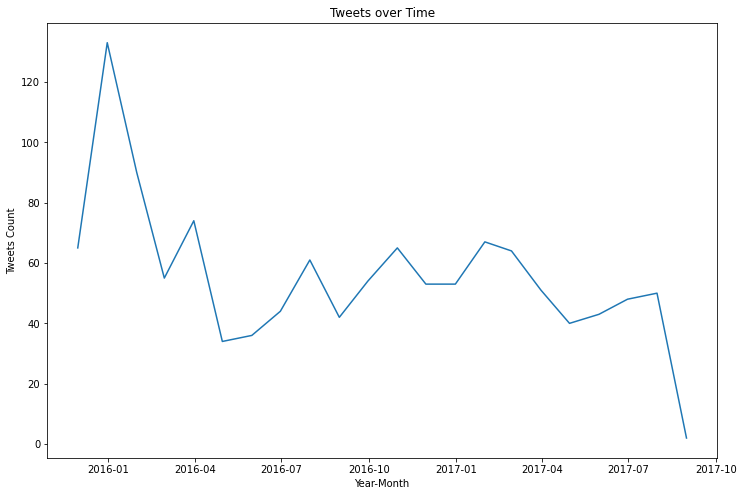

In [55]:
#Plotting tweets count over time
plt.figure(figsize=(12, 8));
plt.plot(tweets_by_month.timestamp, tweets_by_month.tweet_id);
plt.title('Tweets over Time');
plt.xlabel('Year-Month');
plt.ylabel('Tweets Count');


### Insight#1 
**From the visualization above it is evident that the trend for tweets count decreases over time and it peaked between January of 2016 to March of 2016.**

In [56]:
#Check dog stage statistics 
new_twt_archive['stage'].value_counts()

pupper           130
doggo             61
puppo             19
floofer            8
doggo-pupper       7
doggo-puppo        1
doggo-floofer      1
Name: stage, dtype: int64

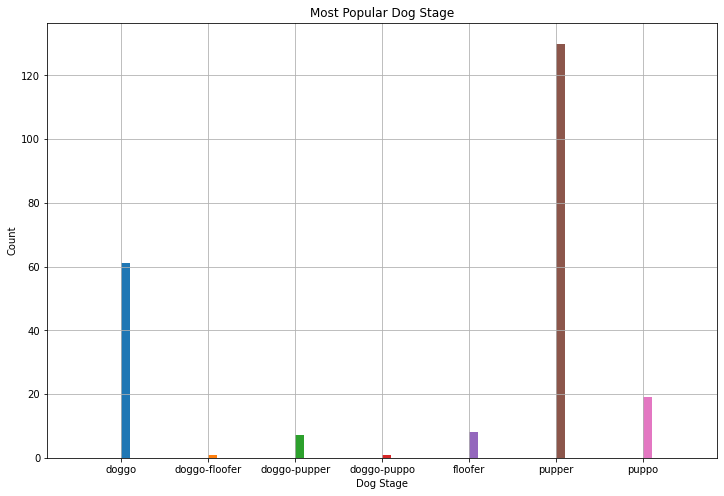

In [57]:
#Visualize dog stages
dog_stage = new_twt_archive.groupby('stage')
dog_stage['stage'].hist(figsize=(12,8))
plt.title('Most Popular Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

### Insight#2

From the results above it shows that most dogs are at the Pupper stage (130 dogs), Doggo is the 2nd most redundant stage, then Puppo then Floofer, the least are the Doggo-Floofer and Doggo-Puppo stages with 1 enrty per stage. 

In [58]:
new_twt_archive.dog_name.value_counts()

None       328
a           17
Charlie      9
Tucker       8
Oliver       8
          ... 
Godi         1
Skittle      1
Willy        1
Tuck         1
Jamesy       1
Name: dog_name, Length: 637, dtype: int64

### Insight#3
From the results above it shows that most Popular dog names are Charlie, Cooper, Tucker, Oliver and Lucy. where Charlie is the most popular name followed by Cooper,Tucker and Oliver.
